# Imports

In [1]:
from IPython.display import display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten Import 

In [2]:
# Daten importieren
from pathlib import Path
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


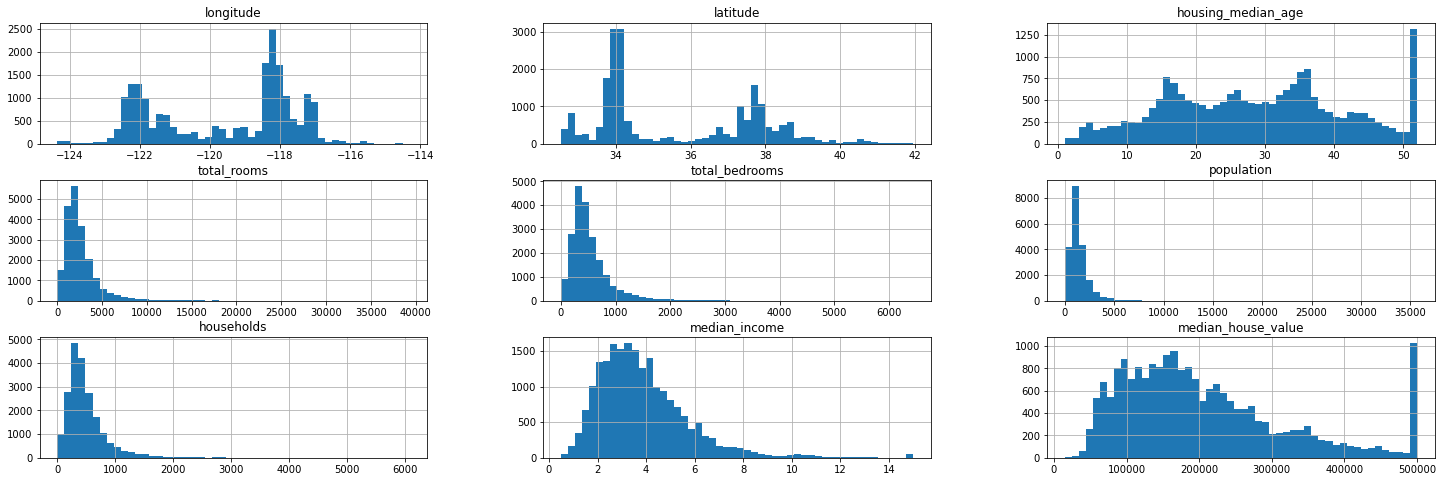

In [7]:
housing.hist(bins=50, figsize=(25,8))
plt.show()

# Testdatensatz erstellen

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# stratifizierte Testdaten
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [9]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

# Spalte income_cat löschen
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Exploration

In [10]:
# Erzeuge Kopie der Test-Daten
housing = strat_train_set.copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


## Visualisierung

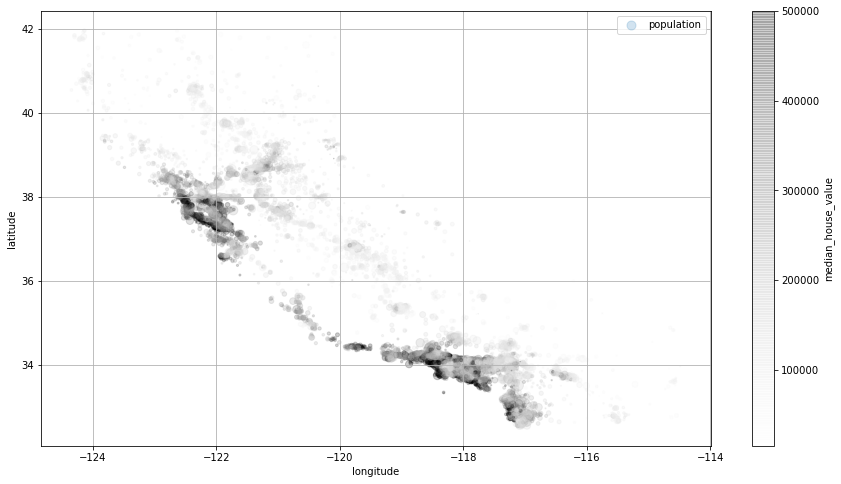

In [11]:
# Geographische Daten 
housing.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude', 
    grid=True, 
    alpha=0.2, 
    s=housing["population"] / 100, 
    label='population', 
    c='median_house_value', 
    colorbar=True, 
    legend=True, 
    sharex=False,
    figsize=(15,8), 
);
plt.show()

## Suche nach Korrelationen

In [12]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

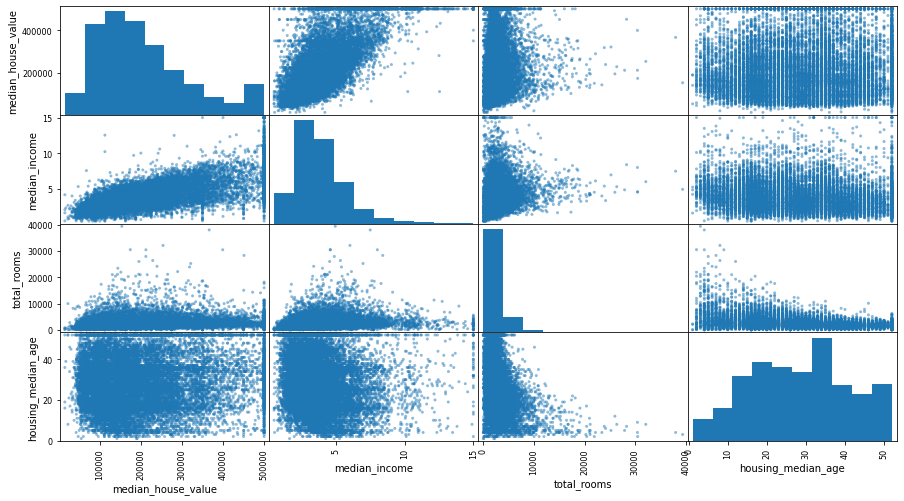

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15,8));

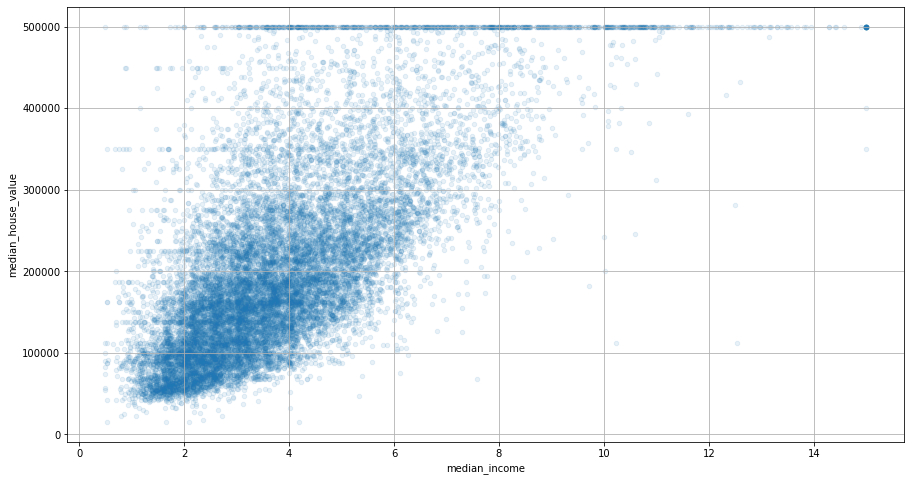

In [14]:
housing.plot(kind='scatter', x="median_income", y='median_house_value', alpha=0.1, grid=True, figsize=(15,8));

## Neue Merkmale erzeugen

In [15]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [16]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

# Vorbereitung für Modell

In [17]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Datenaufbereitung

### Fehlende Werte

In [18]:
# # Null Values entfernen
# housing.dropna(subset=["total_bedrooms"], inplace=True)

# # Merkmal mit Null Values komplett entfernen
# housing.drop("total_bedrooms", axis=1)

# # Imputation
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True)

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # Alternative Strategien: mean, most_frequent, constant

# Funktioniert nur mit numerischen Merkmalen
housing_num = housing.select_dtypes(include=[np.number]) 

imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [20]:
# Transformation und Ersetzen der fehlenden Werte. Alernativ kann direkt fit_transform(df) aufgerufen werden
X = imputer.transform(housing_num) # np Array
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Bearbeiten von Text und kategorischen Merkmalen

In [21]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


In [22]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [23]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [24]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [25]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder() # Um sofort das Array zu erhalten, kann das Argument sparse=False im OneHotEncoder gesetzt werden
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [26]:
# SciPy Sparse Matrix: Speichert nur die Nicht-Null-Werte und ihre Positionen
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [27]:
# NumPy Array
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [28]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Volles OneHotEncoding

In [29]:
one_hot_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)

# housing_cat_1hot = pd.DataFrame(housing_cat_1hot, columns=one_hot_encoder.get_feature_names(), index=housing_cat.index)

# housing_new = pd.concat(
#     (housing.drop(columns=['ocean_proximity']),
#     housing_cat_1hot
#     ),
#     axis=1
# )
# housing_new

C:\Users\marti\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Skalieren und Transformieren von Merkmalen

In [30]:
# Skalierung
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
df_housing_num_min_max_scaled = pd.DataFrame(
    housing_num_min_max_scaled, 
    columns=housing_num.columns,
    index=housing_num.index
)
df_housing_num_min_max_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,0.195740,0.558511,1.000000,0.084414,0.179417,0.096491,0.192832,0.110261
14973,0.605477,0.169149,0.764706,0.049926,0.056853,0.040670,0.066455,0.385353
3785,0.240365,0.618085,0.627451,0.027494,0.034788,0.034290,0.037708,0.133315
14689,0.734280,0.127660,0.313725,0.106109,0.136898,0.112992,0.145417,0.121509
20507,0.628803,0.129787,0.686275,0.110992,0.194878,0.117102,0.218592,0.208914
...,...,...,...,...,...,...,...,...
14207,0.603448,0.139362,0.784314,0.056844,0.095990,0.057355,0.097443,0.290382
13105,0.511156,0.401064,0.431373,0.074851,0.095184,0.086861,0.099123,0.142991
19301,0.739351,0.004255,0.235294,0.099649,0.124658,0.172433,0.141684,0.245631
19121,0.603448,0.160638,0.705882,0.096114,0.140441,0.105631,0.156244,0.251417


In [31]:
# Standardisierung
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaler = std_scaler.fit_transform(housing_num)
df_housing_num_std_scaler = pd.DataFrame(
    housing_num_std_scaler, 
    columns=housing_num.columns,
    index=housing_num.index
)
df_housing_num_std_scaler

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.359094,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.436356,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.759584,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.736231,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.585590,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.136961,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.125165,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.556922,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.788136,0.273563,0.882868,0.145396


### Labels transformieren

In [32]:
some_new_data = housing[["median_income"]]

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(
    LinearRegression(), # gewünschtes Modell
    transformer=StandardScaler() # Skalieren der Labels
)

model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [34]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, ...,
       214354.51281799, 217874.70361169, 181699.39369114])

### Eigene Transformer

#### Log-Transformer

In [35]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

#### Gauß'sche RBF-Ähnlichkeitesmessung

In [36]:
# rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
# age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

### Pipelines

In [37]:
# Pipeline für numerische Attribute -> Imputation und Skalierung
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

In [38]:
# Pipeline ohne Transformer-Namen
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [39]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [40]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, 
    columns=housing_num.columns,
    index=housing_num.index
)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


#### Pipeline für alle Spalten

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [42]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

### Gesamte Datentransformation


In [49]:
housing = load_housing_data()

In [50]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
)

In [53]:
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
], remainder=default_num_pipeline)

In [54]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(20640, 17)

In [57]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__longitude', 'remainder__latitude',
       'remainder__housing_median_age', 'remainder__median_house_value'],
      dtype=object)

In [56]:
df_housing_prepared = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index,
)
df_housing_prepared

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__median_house_value
0,-1.029988,0.628559,-0.049597,-1.634226,-1.129255,-1.692016,-1.561311,1.858786,0.0,0.0,0.0,1.0,0.0,-1.327835,1.052548,0.982143,2.129631
1,-0.888897,0.327041,-0.092512,1.312871,1.648839,1.028461,1.440853,1.852703,0.0,0.0,0.0,1.0,0.0,-1.322844,1.043185,-0.607019,1.314156
2,-1.291686,1.155620,-0.025843,-1.103136,-0.449227,-1.107018,-1.097678,1.567130,0.0,0.0,0.0,1.0,0.0,-1.332827,1.038503,1.856182,1.258693
3,-0.449613,0.156966,-0.050329,-0.811591,-0.636925,-0.947530,-0.807218,1.032566,0.0,0.0,0.0,1.0,0.0,-1.337818,1.038503,1.856182,1.165100
4,-0.639087,0.344711,-0.085616,-0.571285,-0.311482,-0.930649,-0.578372,0.218044,0.0,0.0,0.0,1.0,0.0,-1.337818,1.038503,1.856182,1.172900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.165994,-0.155023,-0.049110,-0.174260,-0.280761,-0.385615,-0.247885,-1.698929,0.0,1.0,0.0,0.0,0.0,-0.758826,1.801647,-0.289187,-1.115804
20636,0.021671,0.276881,0.005021,-1.427361,-1.439476,-1.556094,-1.697841,-0.649557,0.0,1.0,0.0,0.0,0.0,-0.818722,1.806329,-0.845393,-1.124470
20637,0.021134,-0.090318,-0.071735,0.182203,0.122265,-0.148116,0.122682,-1.516731,0.0,1.0,0.0,0.0,0.0,-0.823713,1.778237,-0.924851,-0.992746
20638,0.093467,-0.040211,-0.091225,-0.051560,-0.133391,-0.563455,-0.171521,-1.317404,0.0,1.0,0.0,0.0,0.0,-0.873626,1.778237,-0.845393,-1.058608
